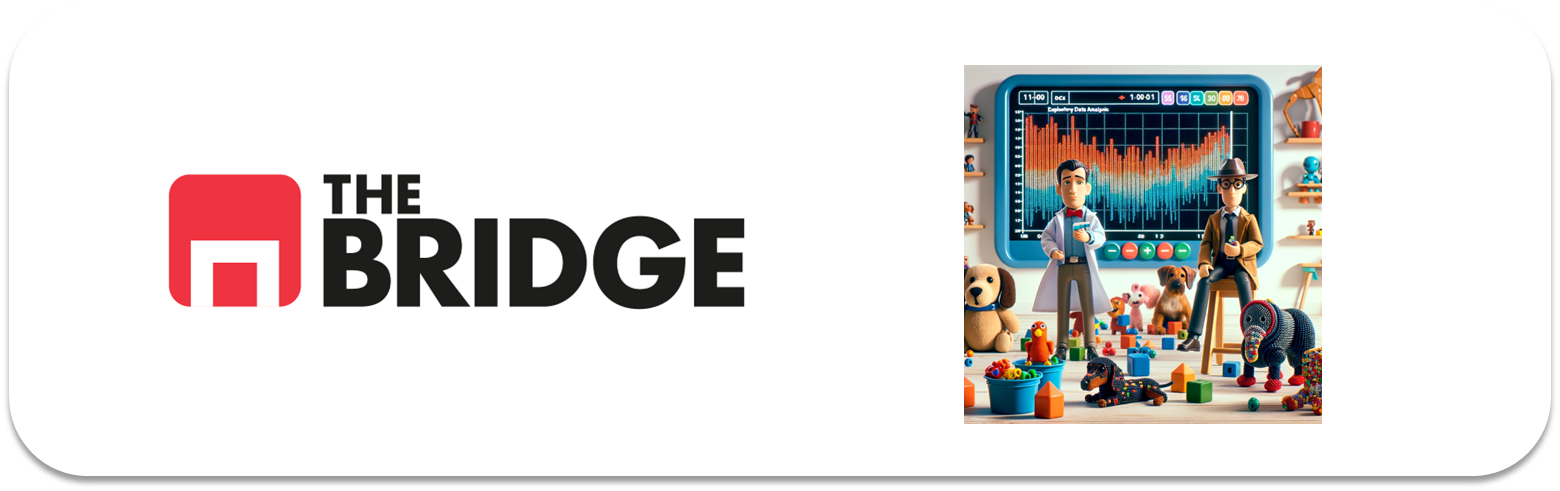

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

* Objetivo: Si lo tengo perfecto, si no -> lo busco

* LIMPIAR/PREPARAR LOS DATOS

* Tabla de variables: definiciones, tipificar, priorizar

* Análisis Univariante: Análisis visual y numérico
    - Categóricas: Moda, Frecuencias Absolutas y Relativas
    - Numéricas: Tendencia central (mediana, media), rangos, posición (percentiles-cuartiles, IQR, CV),distribución (histograma, densidad probabilidad)

* Análisis Bivariante: Análisis visual y numérico
    - Categórica - Categórica: Chi-2
        - Tablas de contigencia (solo para cat. con cardinalidad controlada)
    - Categórica - Numérica: 
        - Categórica es binaria: Prueba U Mann-Whitney (t-student si dist. normal)
        - Categórica no es binaria: ANOVA
    - Numérica - Numérica: Correlación de Pearson (Prueba estadística)
        - No hay correlación de Pearson para categóricas
        - Binarias tampoco es correcto Pearson
    - Notas con ideas, preguntas, cosas extraordinarias

* Análisis Multivariante: A ojo, "free style"

* Haces retrospectiva -> lista de verdades/hipótesis/preguntas/suposiciones/inquietudes

    - Números
    
* Respuestas: MENSAJES
    - Si no hay respuesta en los datos -> ok
    - Si la respuesta es un número -> ok
    - Si la respuesta es NO -> ok

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [35]:
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms, plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot, grafico_dispersion_con_correlacion

from scipy.stats import chi2_contingency, mannwhitneyu

pd.options.mode.copy_on_write = True

## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [8]:
df_titanic = pd.read_csv("data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
df = df_titanic.copy()

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [10]:
df.drop(["deck", "survived", "pclass", "embarked"], axis=1)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [16]:
df["family_members"] = df["parch"] + df["sibsp"]

In [19]:
df.drop(["parch", "sibsp"], axis=1)

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_members
0,0,3,male,22.0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [22]:
moda_embark_town = df["embark_town"].mode()[0]

In [27]:
df["embark_town"].fillna(moda_embark_town, inplace=True)

/var/folders/67/_2bztthn7jvb4dzx2kq6k2gc0000gn/T/ipykernel_59735/1271283047.py:1: ChainedAssignmentError: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
When using the Copy-on-Write mode, such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object.


  df["embark_town"].fillna(moda_embark_town, inplace=True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [28]:
# Columna con flags de imputación
df["age_imputed"] = df.age.isna()

In [30]:
# Imputo el valor por who en age:

# Máscaras por género
is_woman = df.who == "woman"
is_child = df.who == "child"
is_man = df_titanic.who == "man"

# Valores medianos
mediana_woman = df.loc[is_woman,"age"].median()
mediana_child = df.loc[is_child,"age"].median() # No hay chiquillos nulos, pero por las dudas...
mediana_man = df.loc[is_man,"age"].median()

# Imputamos
df.loc[is_woman & df["age_imputed"], "age"] = mediana_woman
df.loc[is_child & df["age_imputed"], "age"] = mediana_child
df.loc[is_man & df["age_imputed"], "age"] = mediana_man

### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

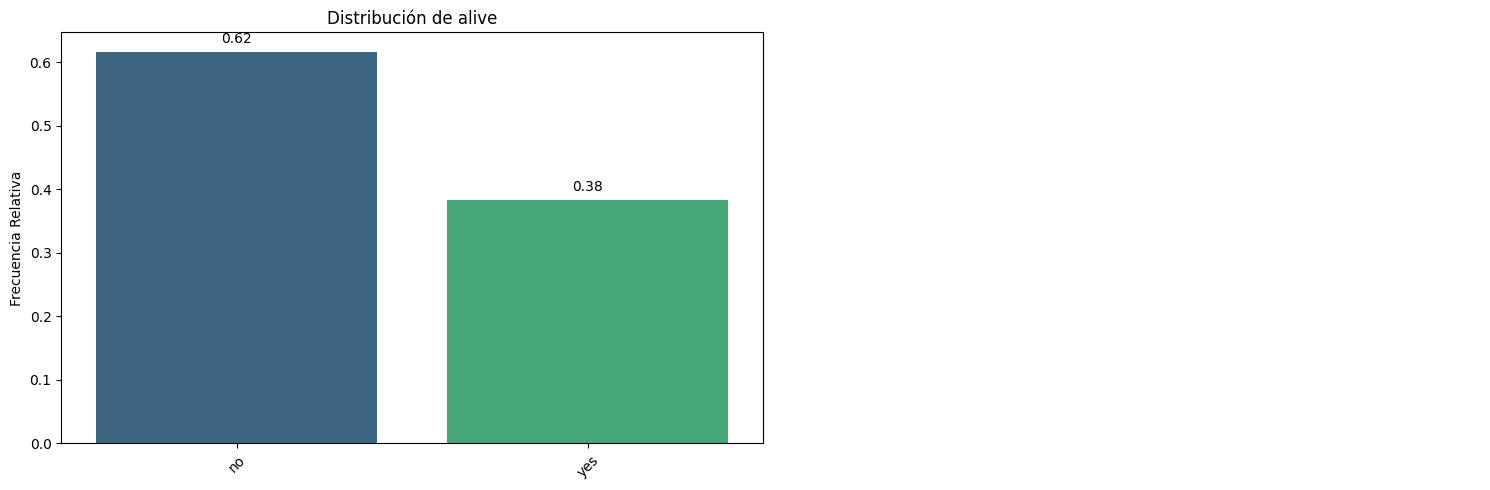

In [31]:
pinta_distribucion_categoricas(df, ["alive"], relativa=True, mostrar_valores=True)

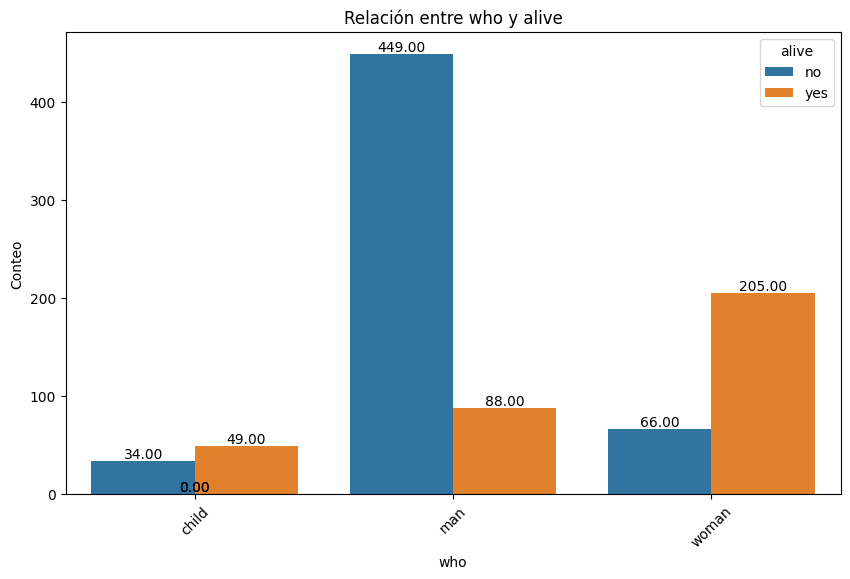

In [ ]:
# 1

plot_categorical_relationship_fin(df, "who", "alive", show_values=True)

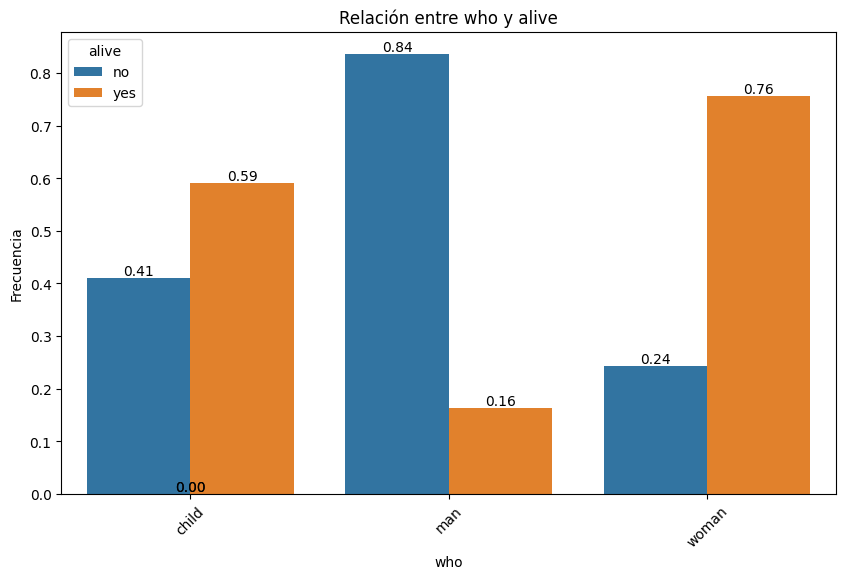

In [52]:
plot_categorical_relationship_fin(df, "who", "alive", relative_freq=True, show_values=True)

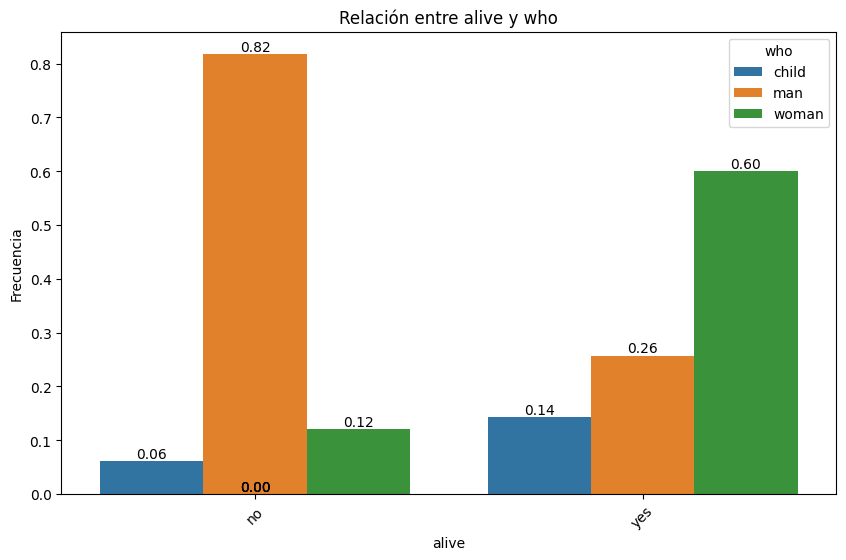

In [53]:
plot_categorical_relationship_fin(df, "alive", "who", relative_freq=True, show_values=True)

* *En términos absolutos murieron muchos más hombres que cualquiera de los otros dos grupos*
* *En términos relativos,también la mortalidad fue superior (visualmente muy superior al del resto de grupos, 84% vs 41% en niños y 24% en mujeres). Y además comparado con la media total se ve claramente que está por encima.*

In [54]:
tabla_contingencia = pd.crosstab(df["alive"], df["who"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frencuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frencuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


In [55]:
p < 0.05

np.True_

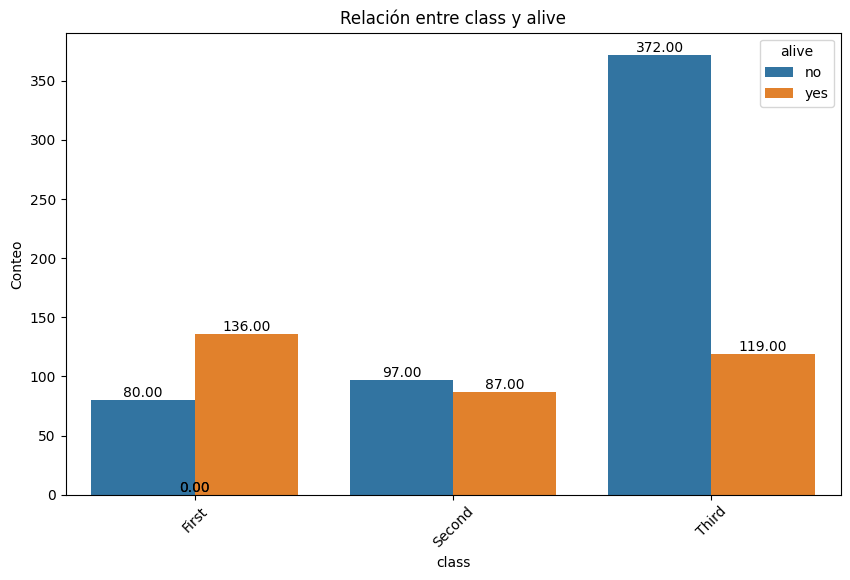

In [ ]:
# 2

plot_categorical_relationship_fin(df, "class", "alive", show_values=True)

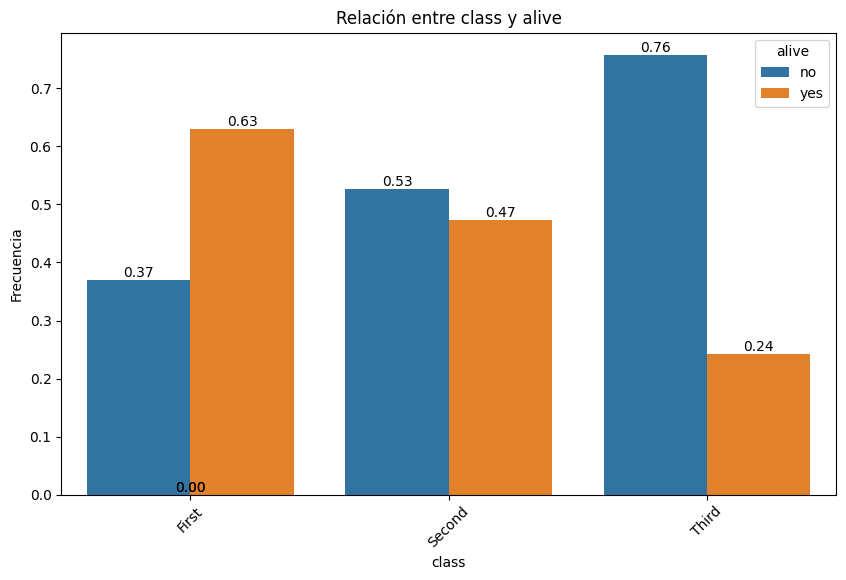

In [57]:
plot_categorical_relationship_fin(df, "class", "alive", relative_freq=True, show_values=True)

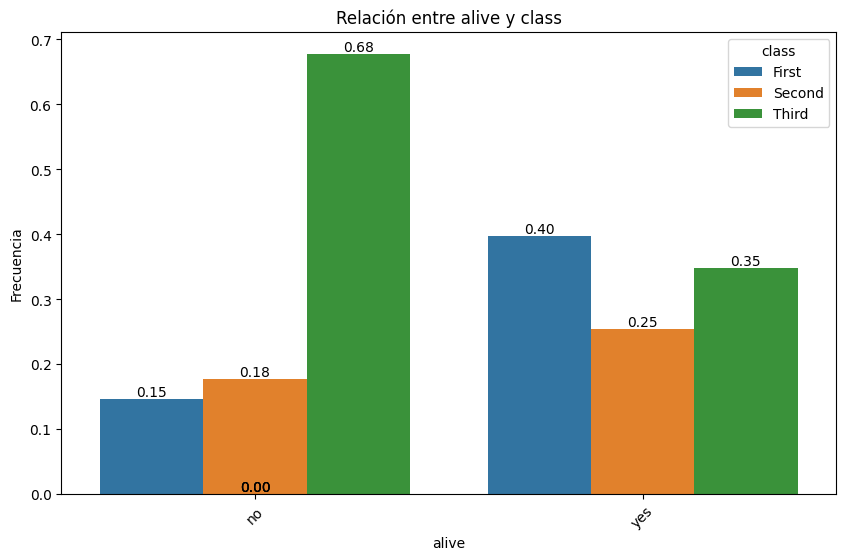

In [58]:
plot_categorical_relationship_fin(df, "alive", "class", relative_freq=True, show_values=True)

In [62]:
tabla_contingencia = pd.crosstab(df["class"], df["alive"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frencuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frencuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [63]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 
    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= relativa, show_values= muestra_valores)

Respuesta Third:


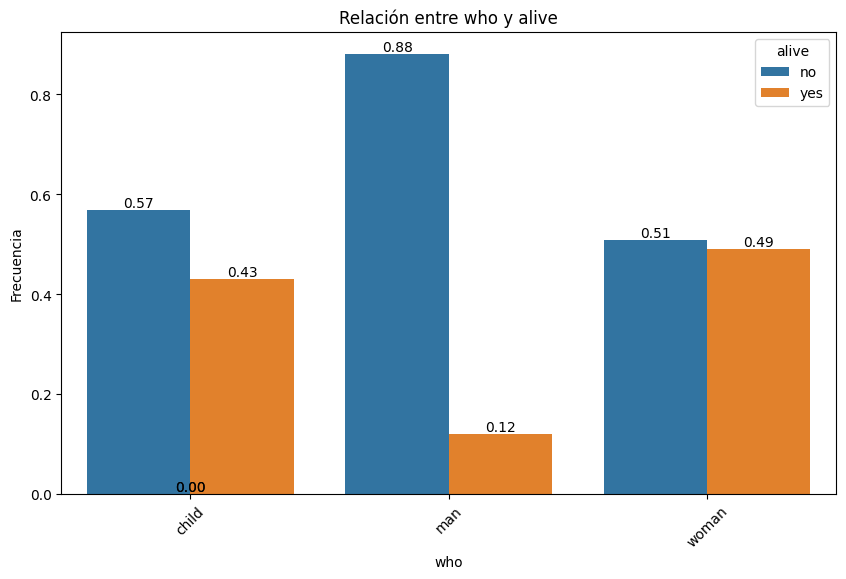

Respuesta First:


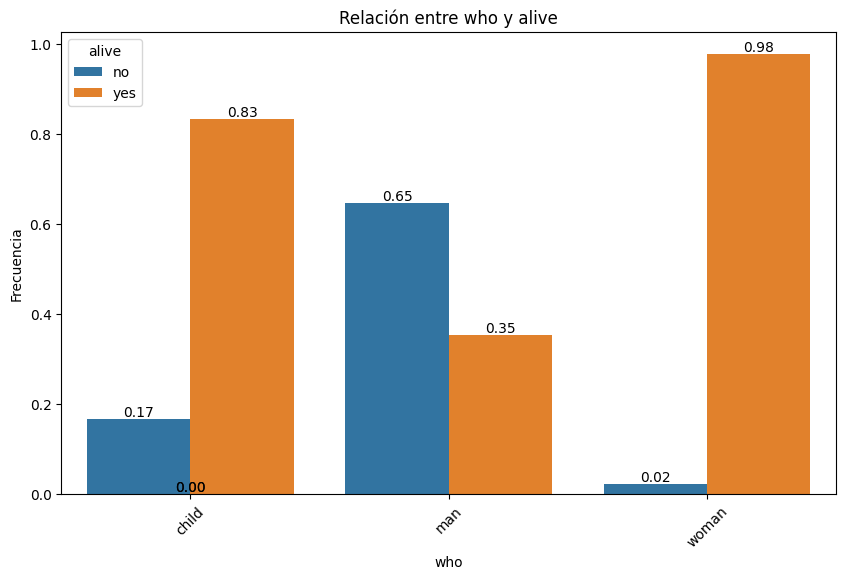

Respuesta Second:


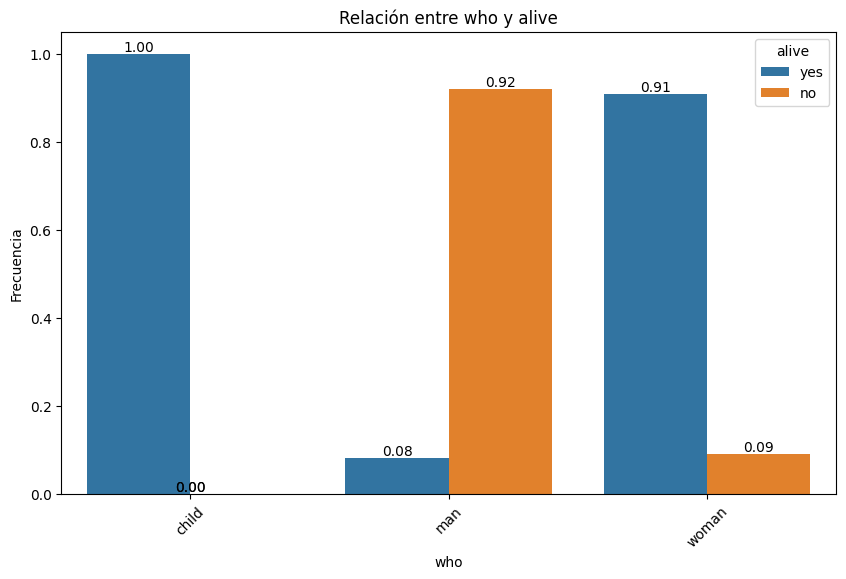

In [65]:
tricategorical_analysis(df, "class", ["alive", "who"], relativa=True, muestra_valores=True)

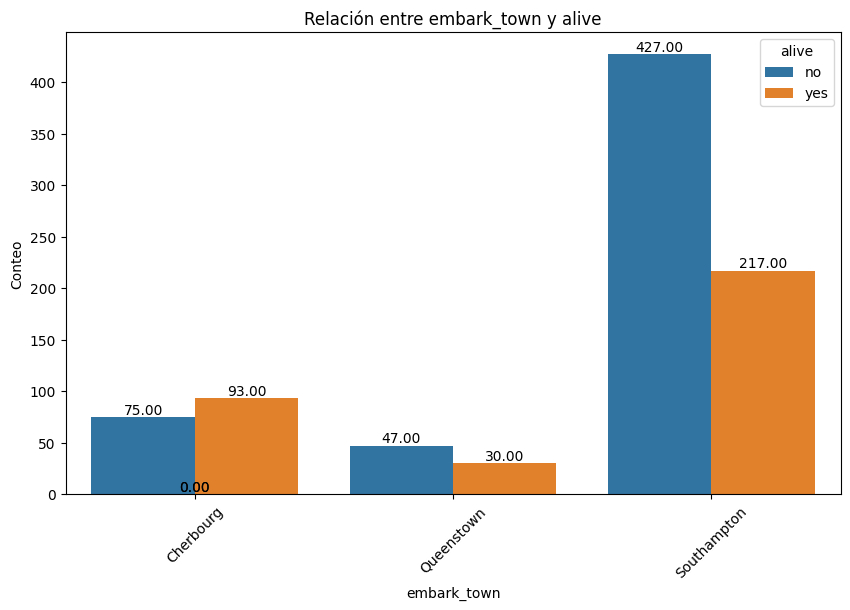

In [ ]:
# 3

plot_categorical_relationship_fin(df, "embark_town", "alive", show_values=True)

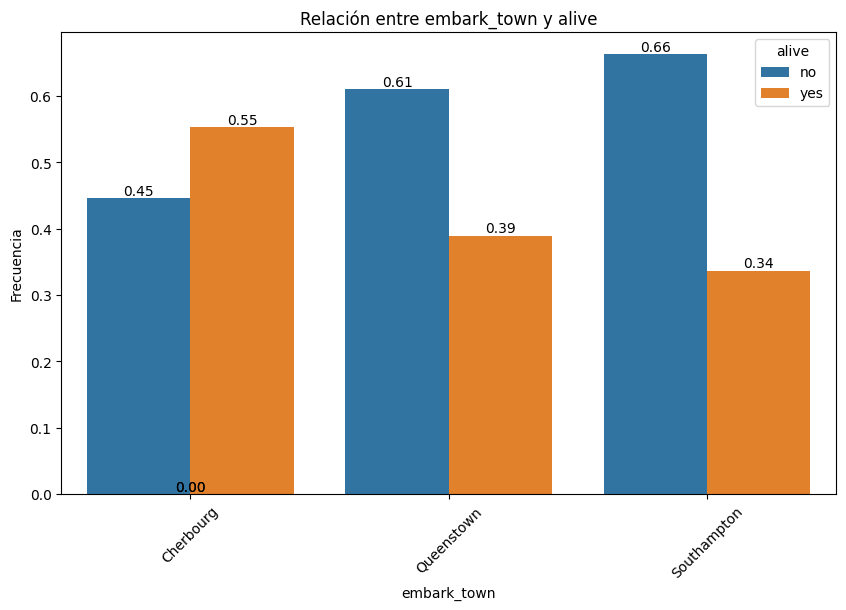

In [68]:
plot_categorical_relationship_fin(df, "embark_town", "alive", relative_freq=True, show_values=True)

In [70]:
tabla_contingencia = pd.crosstab(df["alive"], df["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frencuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 26.48914983923762
P-Value: 1.769922284120912e-06
Grados de Libertad: 2
Tabla de Frencuencias Esperadas:
 [[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]


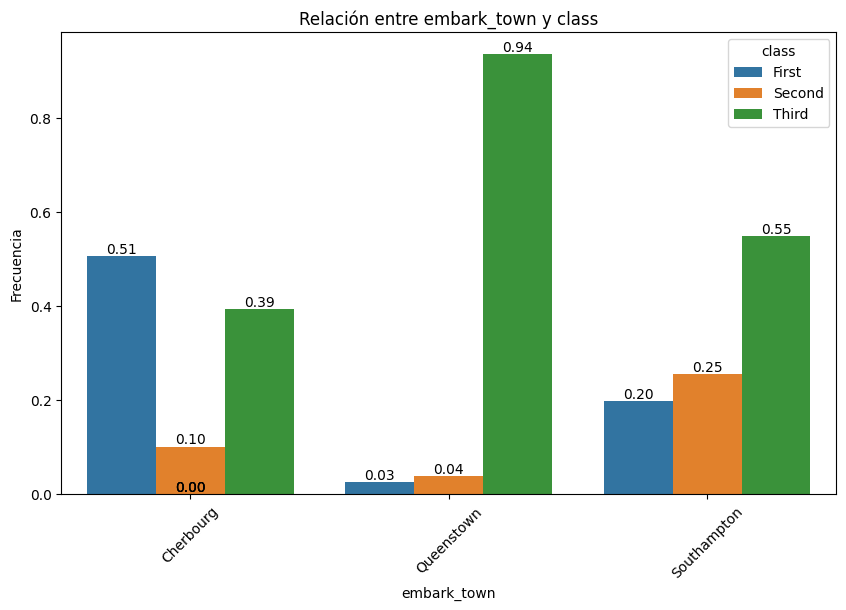

In [71]:
plot_categorical_relationship_fin(df, "embark_town", "class", relative_freq=True, show_values=True)

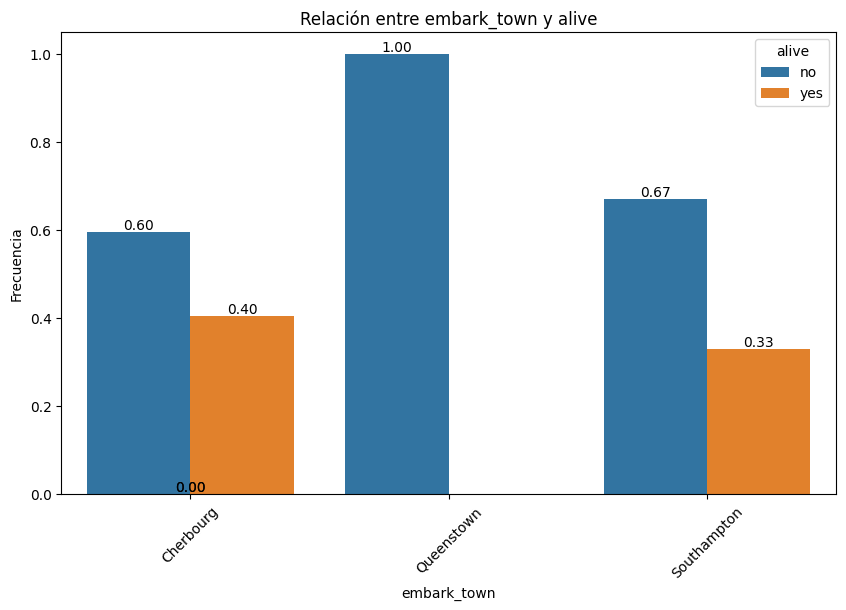

Valor Chi-Cuadrado: 1.2309087111718686
P-Value: 0.5403953078947801
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[27.17647059  0.64705882 49.17647059]
 [14.82352941  0.35294118 26.82352941]]


In [72]:
df_test = df.loc[(df.who == "man") & (df["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas
plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)
tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

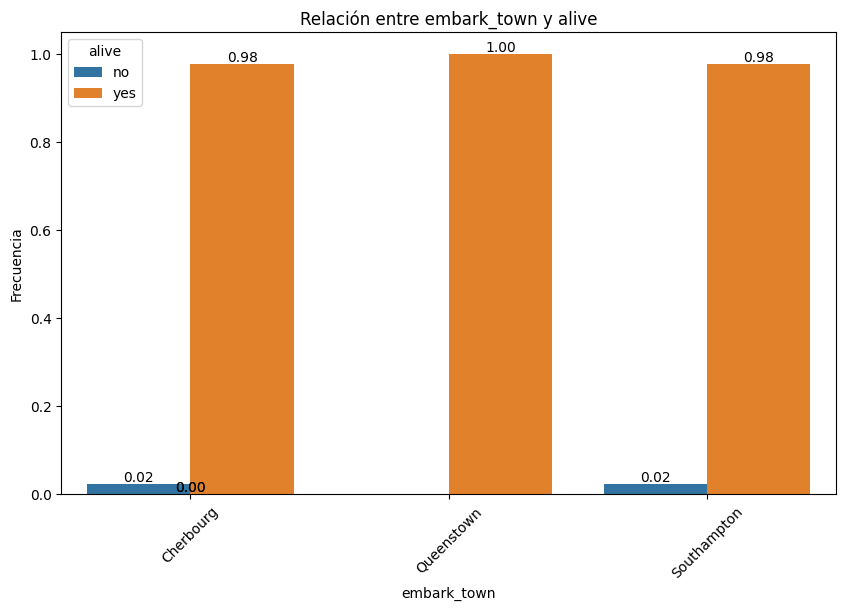

Valor Chi-Cuadrado: 0.02431910659657251
P-Value: 0.987914075337328
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[9.66292135e-01 2.24719101e-02 1.01123596e+00]
 [4.20337079e+01 9.77528090e-01 4.39887640e+01]]


In [73]:
df_test = df.loc[(df.who == "woman") & (df["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas
plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)
tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

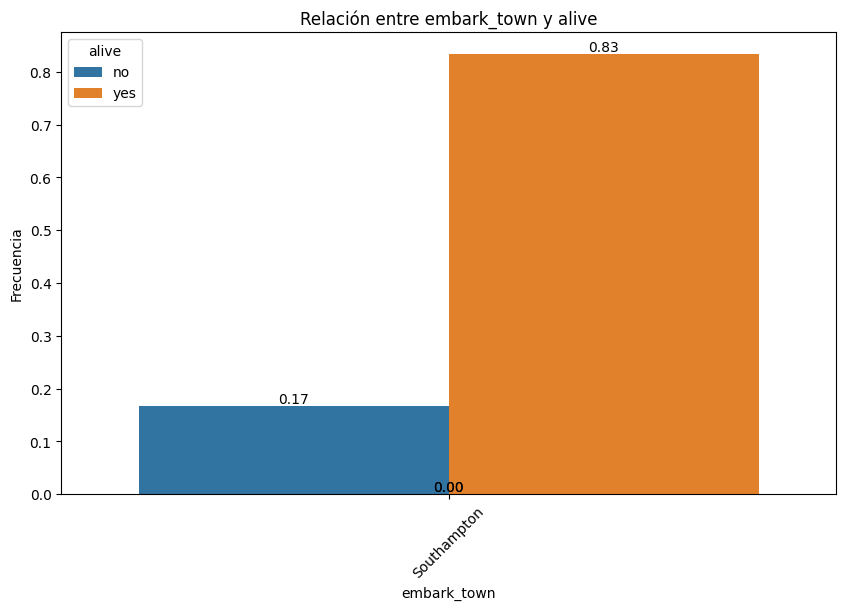

Valor Chi-Cuadrado: 0.0
P-Value: 1.0
Grados de Libertad: 0
Tabla de Frecuencias Esperadas:
 [[1.]
 [5.]]


In [74]:
df_test = df.loc[(df.who == "child") & (df["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas
plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)
tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

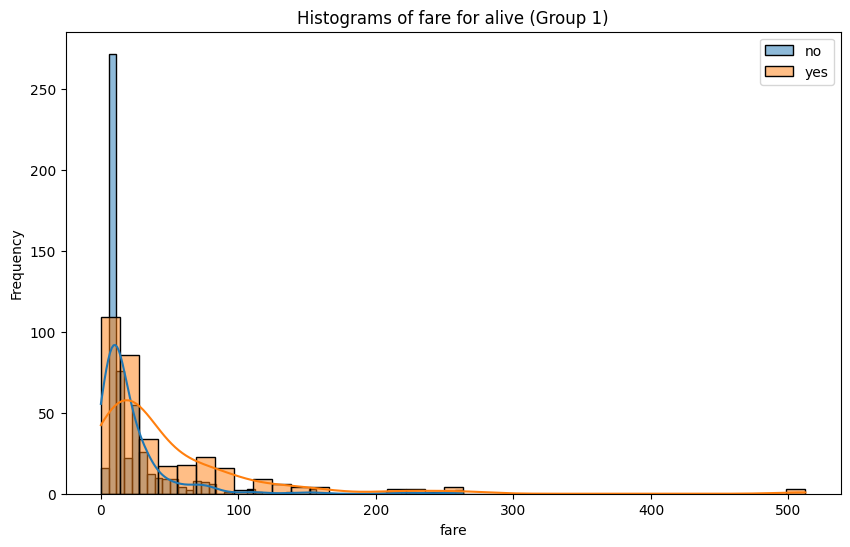

In [76]:
# 4

plot_grouped_histograms(df, "alive", "fare", group_size=2)

In [78]:
grupo_a = df.loc[df.alive == "yes"]["fare"]
grupo_b = df.loc[df.alive == "no"]["fare"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor P:", p_valor)

Estadístico U: 129951.5
Valor P: 4.553477179250238e-22


In [80]:
# 7

df["age"].describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [90]:
# Escojo cuartiles como límites:
bins = [0, 22, 30, 35, 80]
df["cat_age"] = pd.cut(df.age, bins = bins, labels = ["age_1", "age_2", "age_3", "age_4"])

Respuesta age_1:


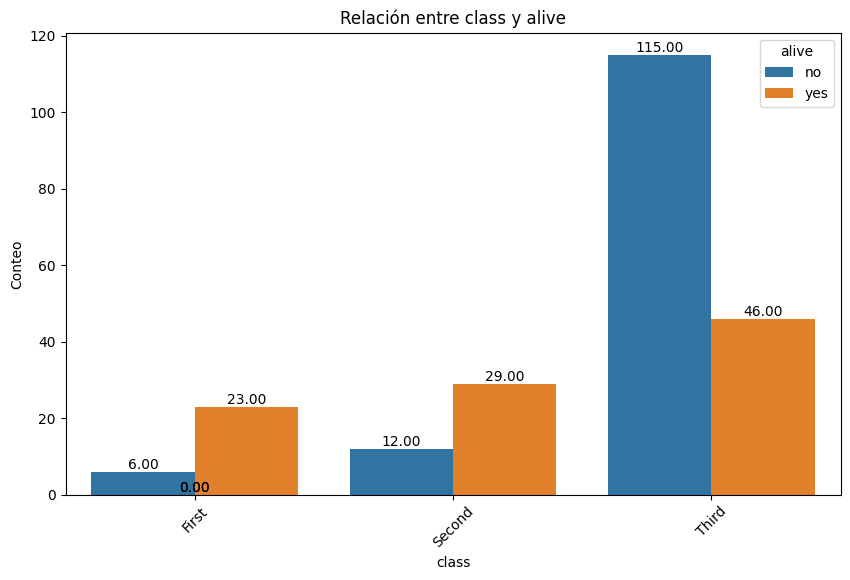

Respuesta age_4:


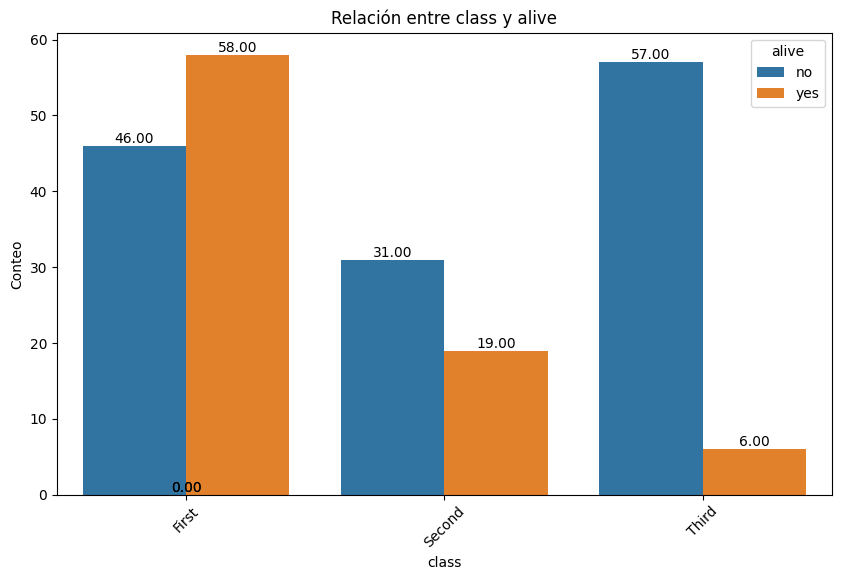

Respuesta age_2:


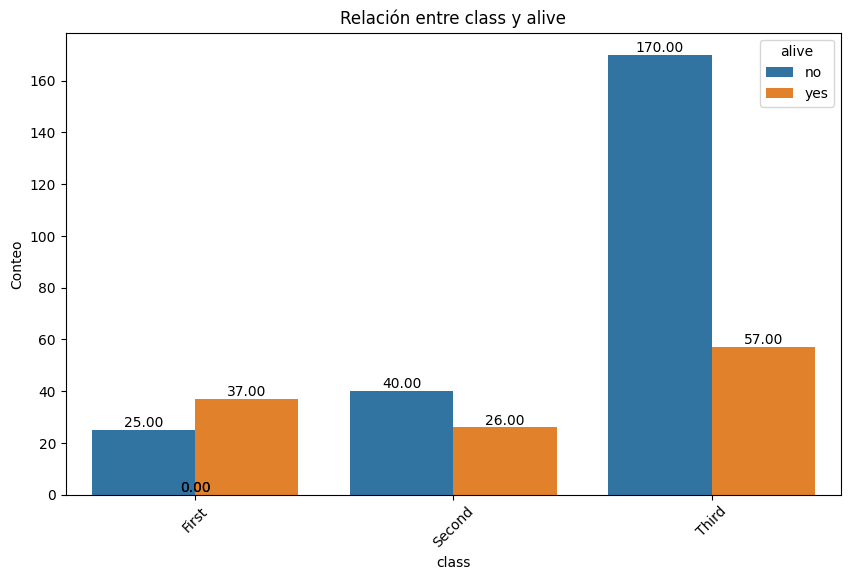

Respuesta age_3:


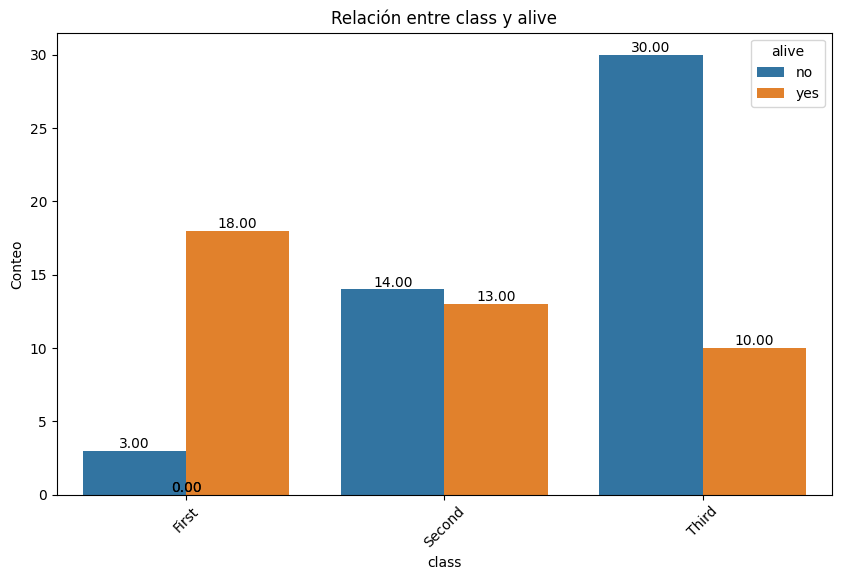

In [91]:
tricategorical_analysis(df = df, directora = "cat_age", otras = ["alive", "class"], muestra_valores=True)

Respuesta age_1:


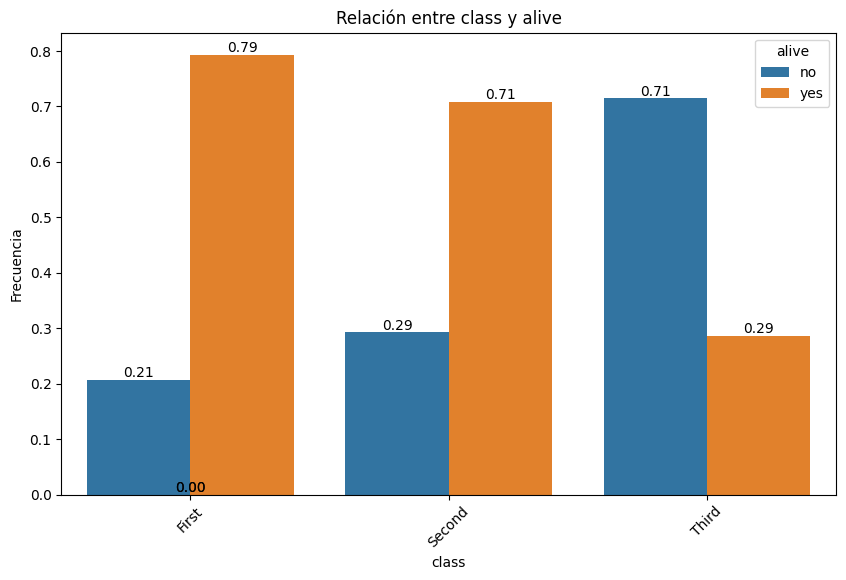

Respuesta age_4:


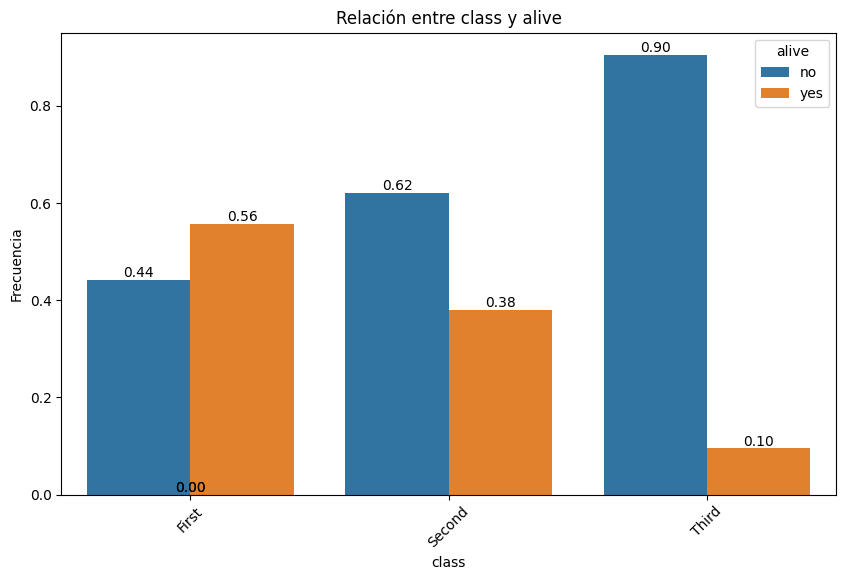

Respuesta age_2:


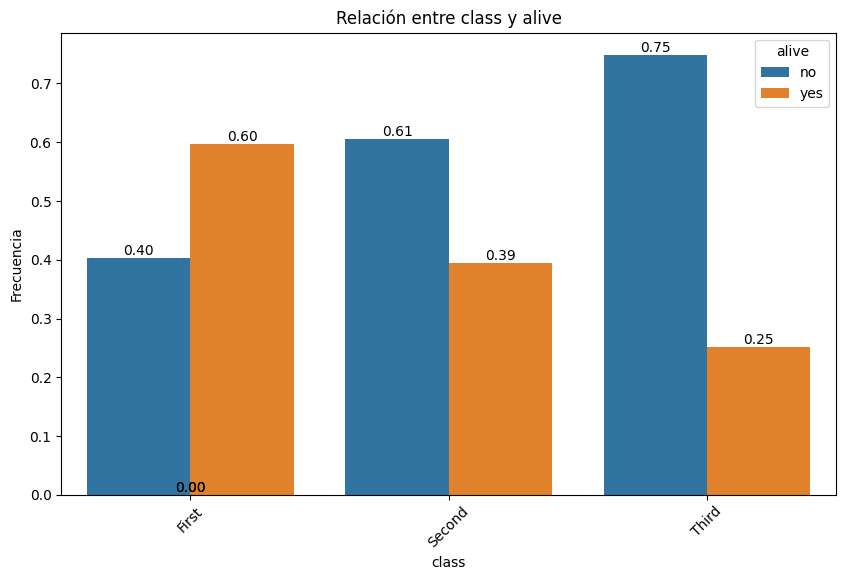

Respuesta age_3:


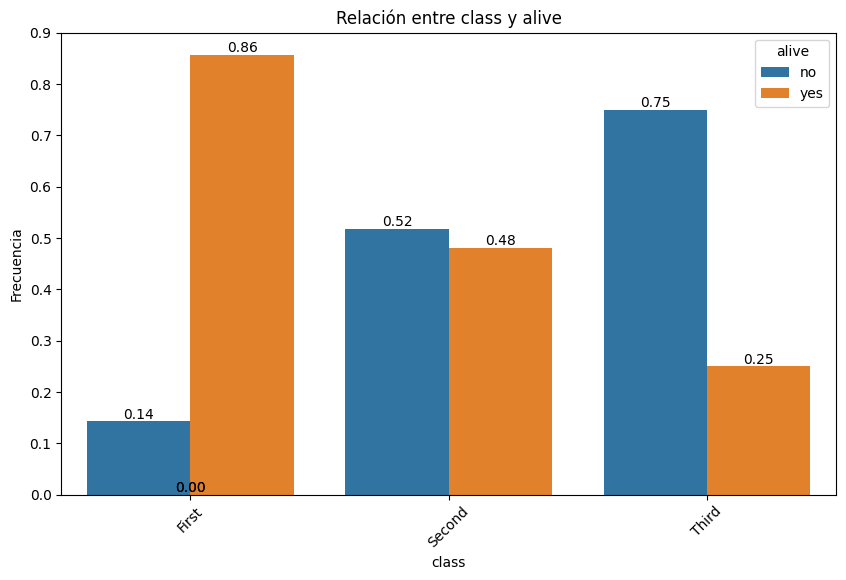

In [92]:
tricategorical_analysis(df = df, directora = "cat_age", otras = ["alive", "class"], relativa=True, muestra_valores=True)

In [94]:
# 8

col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

Respuesta no:


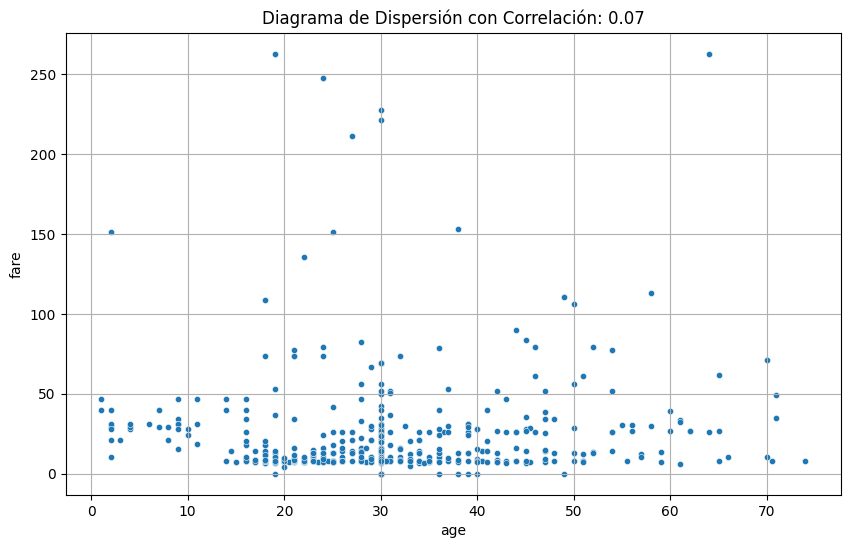

Respuesta yes:


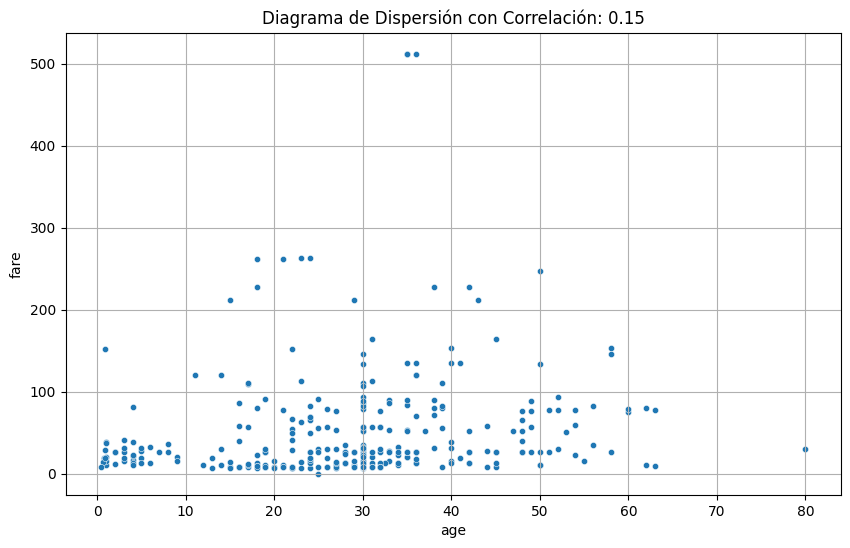

In [95]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?